In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats
import numpy as np

In [2]:
data = {
    "vibration":[56,59,52,49,49,51,48,50,53,44],
    "heat":[47,61,52,41,49,49,56,46,60,51]
}
df = pd.DataFrame(data)
df

,heat,vibration
0,47,56
1,61,59
2,52,52
3,41,49
4,49,49
5,49,51
6,56,48
7,46,50
8,60,53
9,51,44


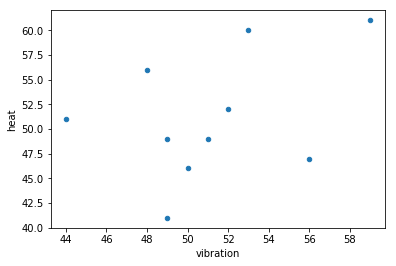

In [3]:
df.plot.scatter('vibration', 'heat')

In [92]:
def simple_anomaly_detector(df, test_value):
    means = df.mean()
    stds = df.std()
    
    probability = 1
    for m,s,v in zip(means, stds, test_value):
        probability = probability * scipy.stats.norm(m, s).pdf(v)
    
    return probability, probability < np.power(0.05, len(test_value))


In [159]:
data = np.array([[[1,2],[3,4]],
          [[2,2],[2,2]],
          [[1,1],[1,1]],
          [[10,10],[10,10]],
          [[1,1],[1,1]],
          [[2,2],[2,2]],
          [[1,1],[1,1]],
          [[4,3],[2,1]]
         ])
data

array([[[ 1,  2],
        [ 3,  4]],

       [[ 2,  2],
        [ 2,  2]],

       [[ 1,  1],
        [ 1,  1]],

       [[10, 10],
        [10, 10]],

       [[ 1,  1],
        [ 1,  1]],

       [[ 2,  2],
        [ 2,  2]],

       [[ 1,  1],
        [ 1,  1]],

       [[ 4,  3],
        [ 2,  1]]])

In [160]:
simple_anomaly_detector(df, [2])

(0.12477864839242818, False)

In [163]:
data = data.flatten().reshape(data.shape[0], data.shape[1] * data.shape[2])

In [164]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,1,2,3,4
1,2,2,2,2
2,1,1,1,1
3,10,10,10,10
4,1,1,1,1
5,2,2,2,2
6,1,1,1,1
7,4,3,2,1


In [165]:
simple_anomaly_detector(df, [1,1,1,1])

(0.00015038793692594924, False)

In [166]:
simple_anomaly_detector(df, [100,100,1,1])

(0.0, True)

In [175]:
df.mean()

0    2.75
1    2.75
2    2.75
3    2.75
dtype: float64

In [173]:
df.std()

0    3.105295
1    3.011881
2    3.011881
3    3.105295
dtype: float64

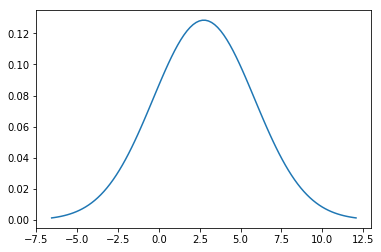

In [178]:
import matplotlib.mlab as mlab
mu = df.mean()[0]
sigma = df.std()[0]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

In [184]:
simple_anomaly_detector(df, [mu - 2*sigma,mu,mu,mu])

(3.918951433182429e-05, False)